# Hometask 

Mine top 10 association rules worth recommending for 
[Groceries dataset](https://www.kaggle.com/heeraldedhia/groceries-dataset)

In [16]:
import numpy as np
from apyori import apriori
import pandas as pd
import matplotlib.pyplot as plt
import re

In [17]:
df = pd.read_csv('Groceries_dataset.csv')
df.head ()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [18]:
len(df)

38765

(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

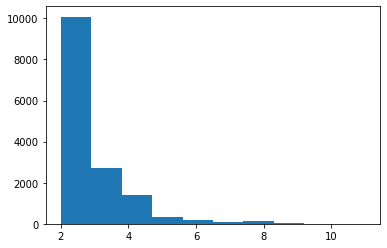

In [19]:
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist)

In [20]:
# get all items
items = df["itemDescription"].values

# preprocess data
transactions = [re.findall(r"\w+", item) for item in items]

In [21]:
transactions[:5]

[['tropical', 'fruit'],
 ['whole', 'milk'],
 ['pip', 'fruit'],
 ['other', 'vegetables'],
 ['whole', 'milk']]

<h4 style="color:green;">Use Apyori</h4>

In [22]:
rules = list(apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 4, min_length = 2))
print(len(rules))
print(rules[:3])

66
[RelationRecord(items=frozenset({'milk', 'UHT'}), support=0.00833225848058816, ordered_statistics=[OrderedStatistic(items_base=frozenset({'UHT'}), items_add=frozenset({'milk'}), confidence=1.0, lift=12.167294413057125)]), RelationRecord(items=frozenset({'hygiene', 'articles'}), support=0.0053656649039081645, ordered_statistics=[OrderedStatistic(items_base=frozenset({'articles'}), items_add=frozenset({'hygiene'}), confidence=1.0, lift=186.37019230769232), OrderedStatistic(items_base=frozenset({'hygiene'}), items_add=frozenset({'articles'}), confidence=1.0, lift=186.37019230769232)]), RelationRecord(items=frozenset({'shopping', 'bags'}), support=0.0188572165613311, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bags'}), items_add=frozenset({'shopping'}), confidence=0.9035846724351051, lift=47.91718170580964), OrderedStatistic(items_base=frozenset({'shopping'}), items_add=frozenset({'bags'}), confidence=1.0, lift=47.91718170580964)])]


In [23]:
def print_rules(rules):
    for rule in rules:
        print (f'rule.items = {list(rule.items)}')
        print (f'rule.support = {rule.support}')

        for os in rule.ordered_statistics:
            print (f'\titems_base = {os.items_base}')
            print (f'\tlifted_item = {os.items_add}')
            print (f'\tlift = {os.lift}')
            print (f'\tconfidence (i.e. cond prob {list(os.items_add)} if {list(os.items_base)}) = {os.confidence}')
            print (f'\n')
        
print_rules(rules)

rule.items = ['milk', 'UHT']
rule.support = 0.00833225848058816
	items_base = frozenset({'UHT'})
	lifted_item = frozenset({'milk'})
	lift = 12.167294413057125
	confidence (i.e. cond prob ['milk'] if ['UHT']) = 1.0


rule.items = ['hygiene', 'articles']
rule.support = 0.0053656649039081645
	items_base = frozenset({'articles'})
	lifted_item = frozenset({'hygiene'})
	lift = 186.37019230769232
	confidence (i.e. cond prob ['hygiene'] if ['articles']) = 1.0


	items_base = frozenset({'hygiene'})
	lifted_item = frozenset({'articles'})
	lift = 186.37019230769232
	confidence (i.e. cond prob ['articles'] if ['hygiene']) = 1.0


rule.items = ['shopping', 'bags']
rule.support = 0.0188572165613311
	items_base = frozenset({'bags'})
	lifted_item = frozenset({'shopping'})
	lift = 47.91718170580964
	confidence (i.e. cond prob ['shopping'] if ['bags']) = 0.9035846724351051


	items_base = frozenset({'shopping'})
	lifted_item = frozenset({'bags'})
	lift = 47.91718170580964
	confidence (i.e. cond prob ['b

## Learn more

[How to conduct market basket analysis](https://towardsdatascience.com/how-to-conduct-market-basket-analysis-f14f391a8625)

[DATA MINING : MARKET BASKET ANALYSIS (PART 1)](https://medium.com/@wisnuprsj/data-mining-market-basket-analysis-5fa641f59eeb)

[Association Rules (AR)](https://www.nosimpler.me/association-rules/)